In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h16 = pd.read_csv('2016.csv', on_bad_lines='skip')
h16.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace=True)

h16 = h16.round(2)
h16.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1             7.53   
1  Switzerland  Western Europe               2             7.51   
2      Iceland  Western Europe               3             7.50   
3       Norway  Western Europe               4             7.50   
4      Finland  Western Europe               5             7.41   

   Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
0                      1.44    1.16                      0.80     0.58   
1                      1.53    1.15                      0.86     0.59   
2                      1.43    1.18                      0.87     0.57   
3                      1.58    1.13                      0.80     0.60   
4                      1.41    1.13                      0.81     0.57   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                           0.44        0.36               2.74  
1                           0.41        0.28               2.69  
2                           0.15        0.48               2.83  
3                           0.36        0.38               2.66  
4                           0.41        0.25               2.83

- Average of happiness score 

In [4]:
happiness = h16['Happiness Score'].mean()
print(happiness)

5.382420382165605


1- The repeat size of each region

In [5]:
region = h16['Region'].value_counts().reset_index()
sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\3516590835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')


2- Top Regions with Happiness Score > 5.3 in 2016

In [6]:
filtered = h16[h16['Happiness Score'] > 5.3]
region = filtered['Region'].value_counts().reset_index()
region.columns = ['Region', 'count']
sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')
plt.title('Top Regions with Happiness Score > 5.3')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\1045377250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')


3- Top Regions with Happiness Score < 5.3 in 2016

In [7]:
filtered = h16[h16['Happiness Score'] < 5.3]
region = filtered['Region'].value_counts().reset_index()
region.columns = ['Region', 'count']
sns.barplot(x='count', y='Region', data=region.head(8), palette='viridis')
plt.title('Top Regions with Happiness Score < 5.3')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\768150714.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(8), palette='viridis')


4- Comparison of average scores by category for all regions

C:\Users\User\AppData\Local\Temp\ipykernel_8620\2572577953.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


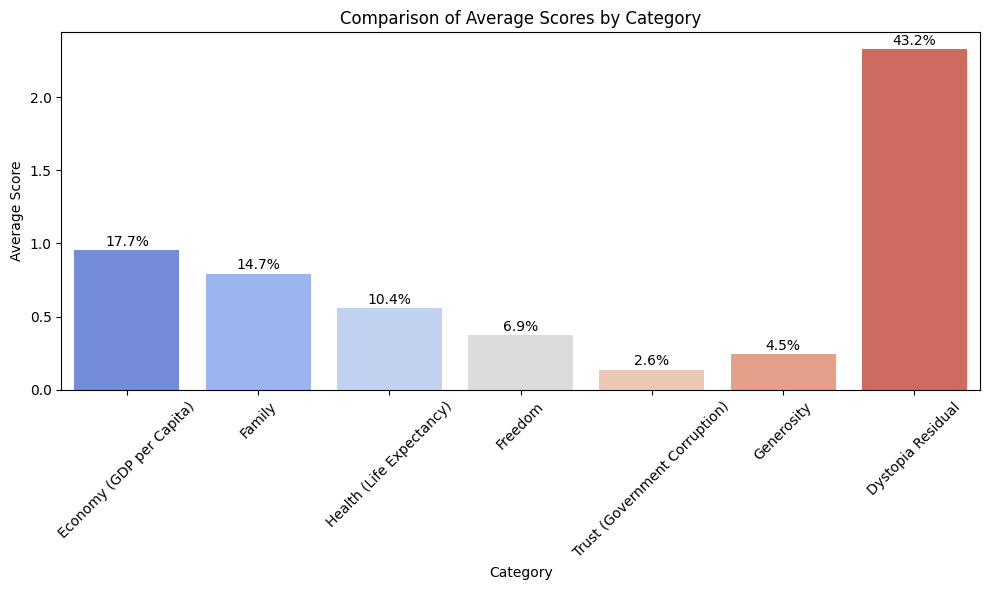

In [10]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
averages = h16[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Comparison of Average Scores by Category')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5- Comparison of average scores by category for all regions with a happiness score greater than 5.3

In [11]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
high_score = h16[h16['Happiness Score'] > 5.3]
averages = high_score[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Scores for Countries with Happiness Score > 5.3')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\2924355078.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


6- Comparison of average scores by category for all areas with a happiness score less than or equal to 5.3

C:\Users\User\AppData\Local\Temp\ipykernel_8620\147276195.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


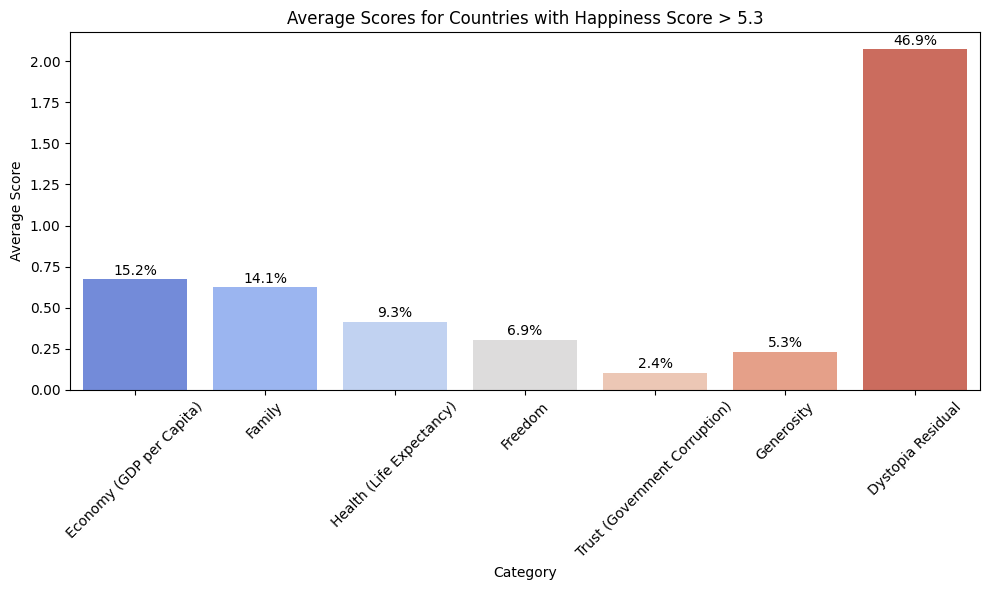

In [12]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
high_score = h16[h16['Happiness Score'] <= 5.3]
averages = high_score[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Scores for Countries with Happiness Score > 5.3')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7- Average Indicators for Latin America and Caribbean Region

In [13]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
latin = h16[h16['Region'] == 'Latin America and Caribbean']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Latin America and Caribbean Region')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\2955729160.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


8- Average Indicators for Western Europe

In [14]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
latin = h16[h16['Region'] == 'Western Europe']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Western Europe')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\4101540252.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


9- Average Indicators for Eastern Europe

In [16]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
latin = h16[h16['Region'] == 'Central and Eastern Europe']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Central and Eastern Europe')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\34154287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


10- Average Indicators for Middle East and Northern Africa

C:\Users\User\AppData\Local\Temp\ipykernel_8620\3066717245.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


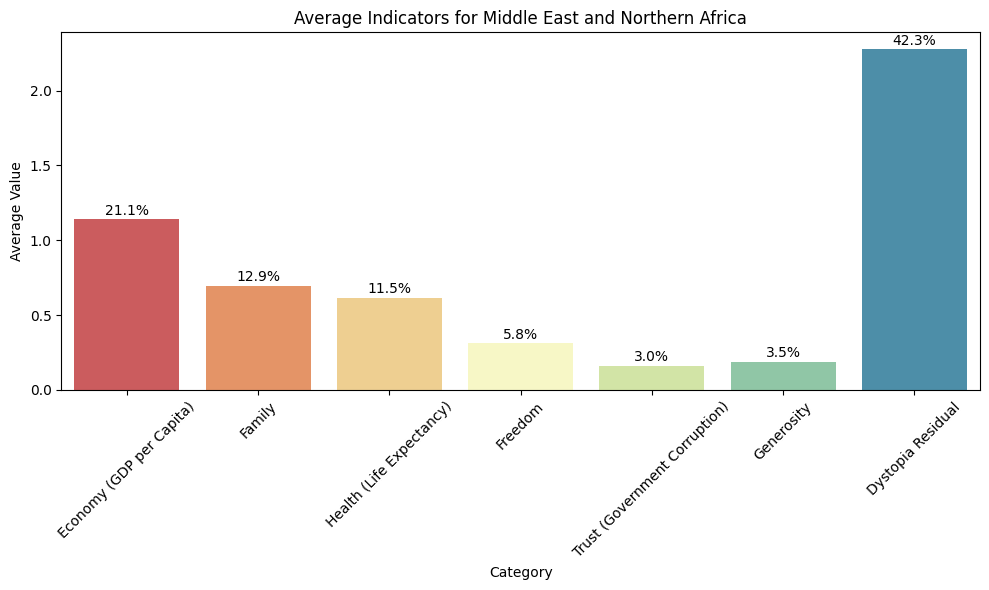

In [17]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
latin = h16[h16['Region'] == 'Middle East and Northern Africa']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Middle East and Northern Africa')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

11- Average Indicators for Southeastern Asia

C:\Users\User\AppData\Local\Temp\ipykernel_8620\3945827646.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


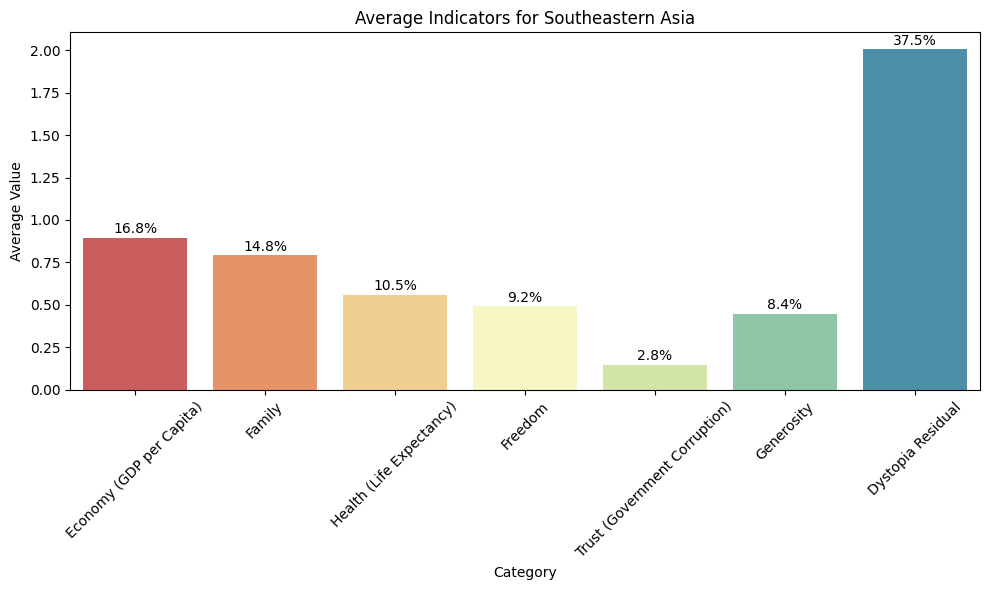

In [18]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
latin = h16[h16['Region'] == 'Southeastern Asia']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Southeastern Asia')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12- Average Indicators for Eastern Asia

In [19]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
latin = h16[h16['Region'] == 'Eastern Asia']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Eastern Asia')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\3270805202.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


13- Average Indicators for Australia and New Zealand

C:\Users\User\AppData\Local\Temp\ipykernel_8620\3809906691.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


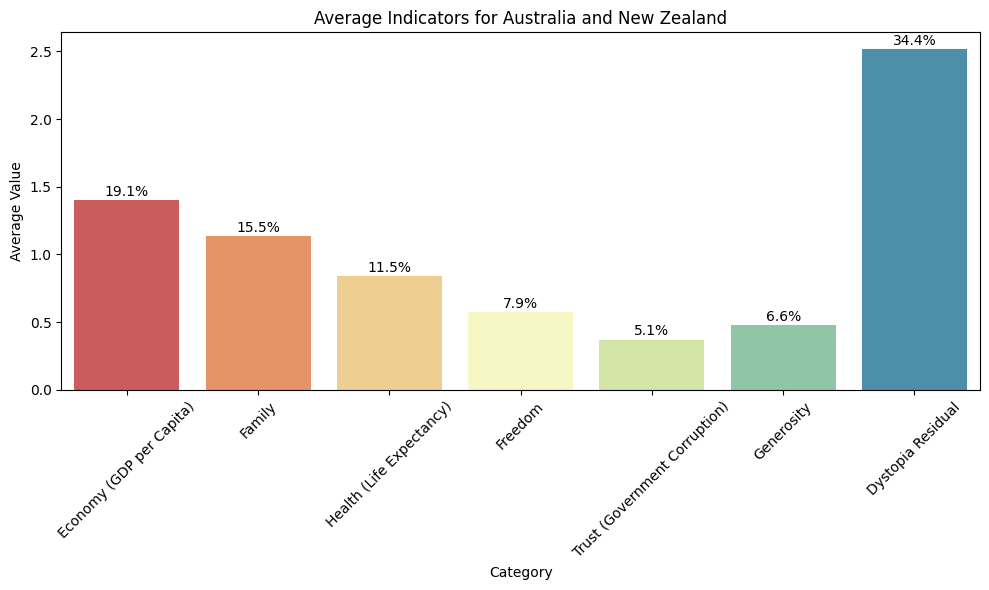

In [21]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
latin = h16[h16['Region'] == 'Australia and New Zealand']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Australia and New Zealand')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

14- Average Indicators for North America

In [22]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
latin = h16[h16['Region'] == 'North America']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for North America')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\2726772351.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


15- Average Indicators for Sub-Saharan Africa

In [23]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
latin = h16[h16['Region'] == 'Sub-Saharan Africa']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Sub-Saharan Africa')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\2022449088.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


16- Top 10 Countries by Economy % of Happiness Score

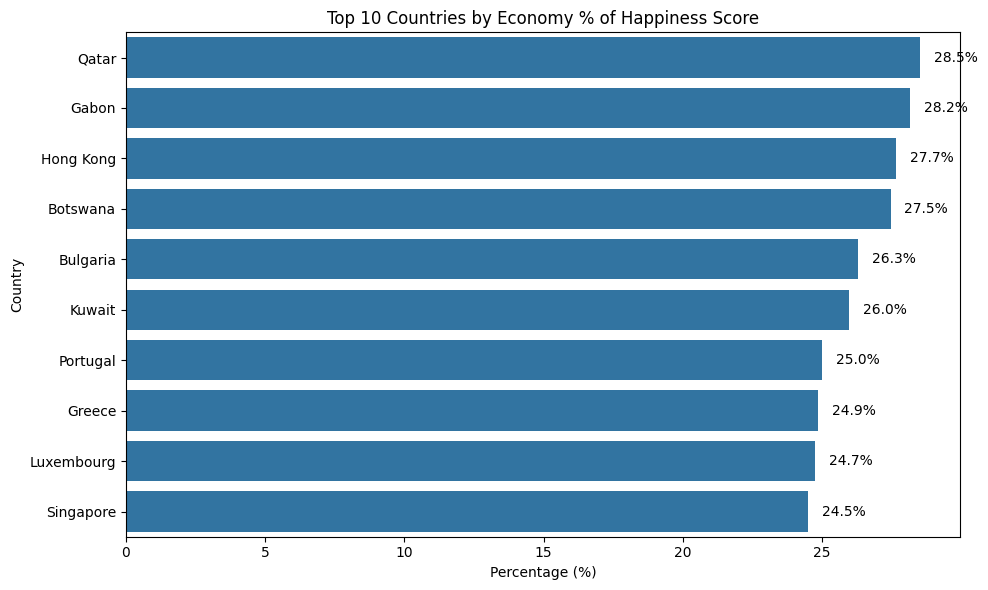

In [24]:
h16 = h16[h16['Happiness Score'] > 2].copy()

h16['Economy_pct'] = (h16['Economy (GDP per Capita)'] / h16['Happiness Score']) * 100
top10 = h16.sort_values(by='Economy_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Economy % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Economy_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

17- Top 10 Countries by Family % of Happiness Score

In [25]:
h16['Family_pct'] = (h16['Family'] / h16['Happiness Score']) * 100
top10 = h16.sort_values(by='Family_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Family_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Family % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Family_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()


18- Top 10 Countries by Health % of Happiness Score

In [26]:
h16['Health_pct'] = (h16['Health (Life Expectancy)'] / h16['Happiness Score']) * 100
top10 = h16.sort_values(by='Health_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Health_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Health % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Health_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

19- Top 10 Countries by Freedom % of Happiness Score

In [27]:
h16['Freedom_pct'] = (h16['Freedom'] / h16['Happiness Score']) * 100
top10 = h16.sort_values(by='Freedom_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Freedom_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Freedom % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Freedom_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

20- Top 10 Countries by Trust % of Happiness Score

In [28]:
h16['Trust_pct'] = (h16['Trust (Government Corruption)'] / h16['Happiness Score']) * 100
top10 = h16.sort_values(by='Trust_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Trust_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Trust % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Trust_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

21- Top 10 Countries by Generosity % of Happiness Score

In [29]:
h16['Generosity_pct'] = (h16['Generosity'] / h16['Happiness Score']) * 100
top10 = h16.sort_values(by='Generosity_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Generosity_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Generosity % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Generosity_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

22-  Top 10 Countries by Dystopia Residual % of Happiness Score

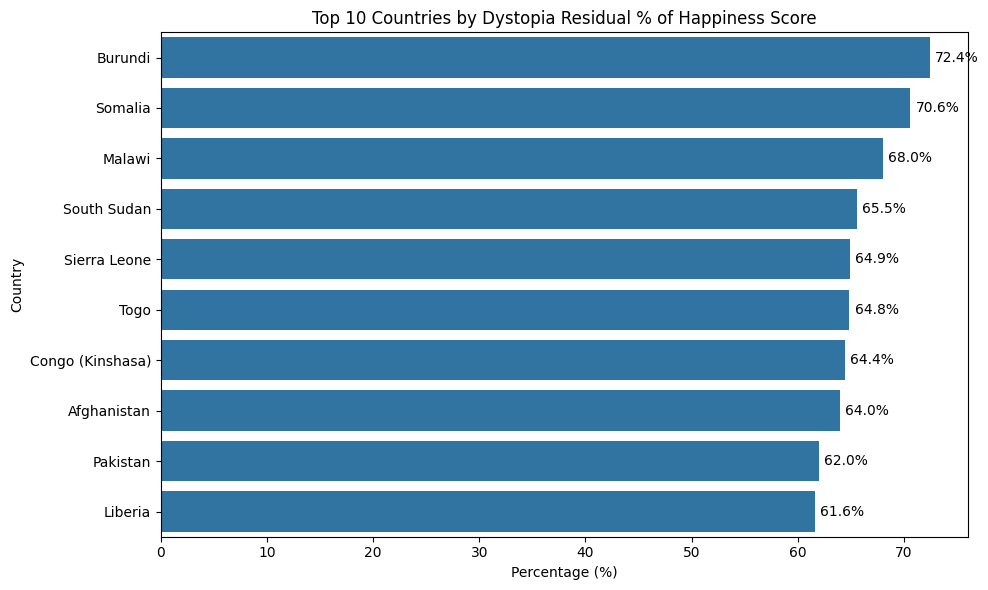

In [30]:
h16['Dystopia Residual_pct'] = (h16['Dystopia Residual'] / h16['Happiness Score']) * 100
top10 = h16.sort_values(by='Dystopia Residual_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Dystopia Residual_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Dystopia Residual % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Dystopia Residual_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

23- Top 10 Countries by Economy (GDP per Capita)

C:\Users\User\AppData\Local\Temp\ipykernel_8620\3715785570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy (GDP per Capita)', y='Country', data=top_10, palette='crest')


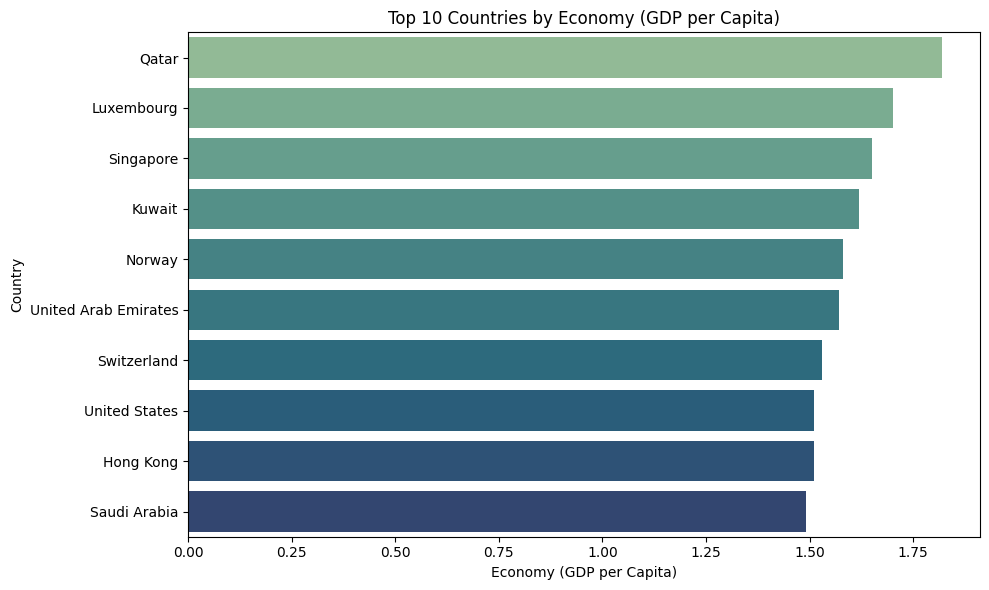

In [31]:
top_10 = h16[['Country', 'Economy (GDP per Capita)']].sort_values(by='Economy (GDP per Capita)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy (GDP per Capita)', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

24- Top 10 Countries by Family

C:\Users\User\AppData\Local\Temp\ipykernel_8620\4089646664.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family', y='Country', data=top_10, palette='crest')


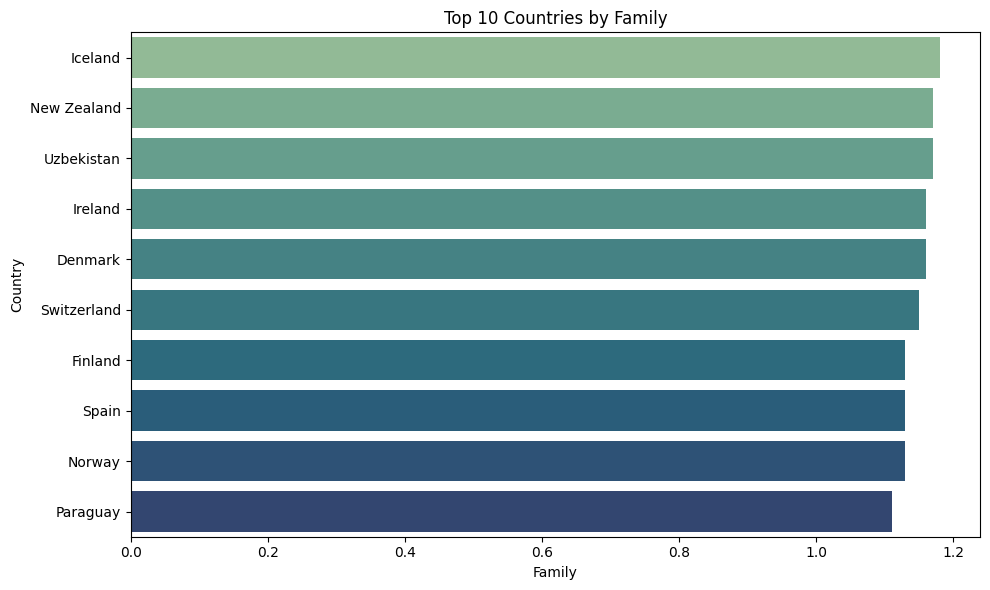

In [32]:
top_10 = h16[['Country', 'Family']].sort_values(by='Family', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Family', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Family')
plt.xlabel('Family')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


25- Top 10 Countries by Health (Life Expectancy)

In [33]:
top_10 = h16[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Health (Life Expectancy)', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8620\2171181616.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Health (Life Expectancy)', y='Country', data=top_10, palette='crest')


26- Top 10 Countries by Freedom

C:\Users\User\AppData\Local\Temp\ipykernel_8620\878341482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Freedom', y='Country', data=top_10, palette='crest')


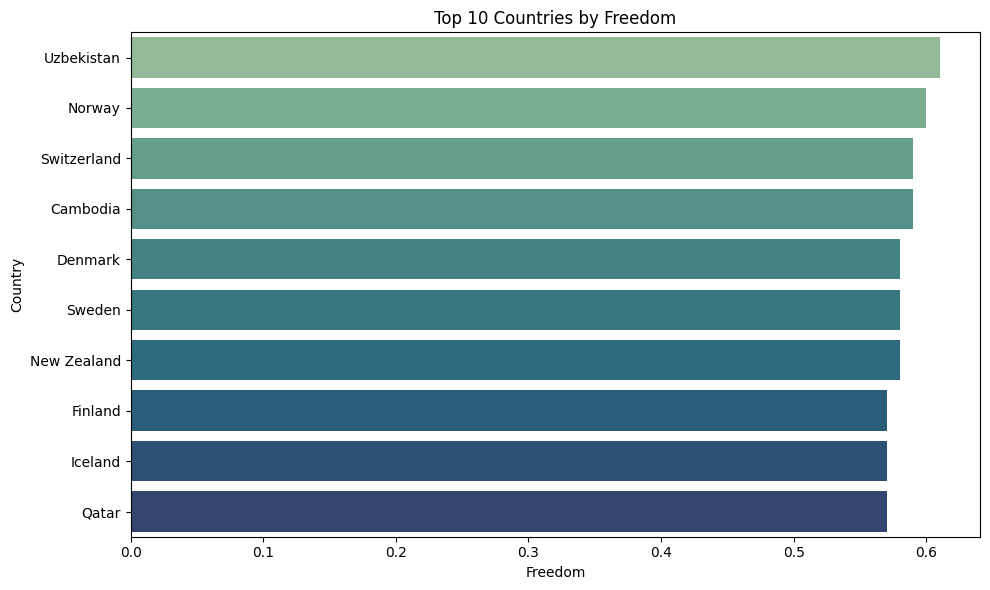

In [34]:
top_10 = h16[['Country', 'Freedom']].sort_values(by='Freedom', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Freedom', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Freedom')
plt.xlabel('Freedom')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


27- Top 10 Countries by Trust (Government Corruption)

In [35]:
top_10 = h16[['Country', 'Trust (Government Corruption)']].sort_values(by='Trust (Government Corruption)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Trust (Government Corruption)', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8620\1259252367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trust (Government Corruption)', y='Country', data=top_10, palette='crest')


28- Top 10 Countries by Generosity

C:\Users\User\AppData\Local\Temp\ipykernel_8620\2706472018.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generosity', y='Country', data=top_10, palette='crest')


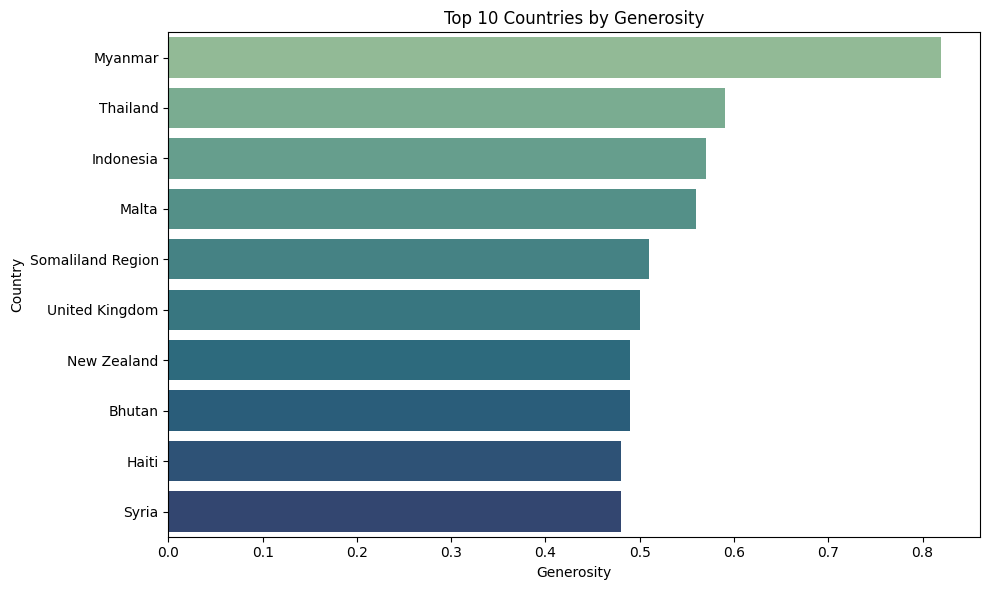

In [36]:
top_10 = h16[['Country', 'Generosity']].sort_values(by='Generosity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Generosity', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Generosity')
plt.xlabel('Generosity')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


29- Top 10 Countries by Dystopia Residual

C:\Users\User\AppData\Local\Temp\ipykernel_8620\630488036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dystopia Residual', y='Country', data=top_10, palette='crest')


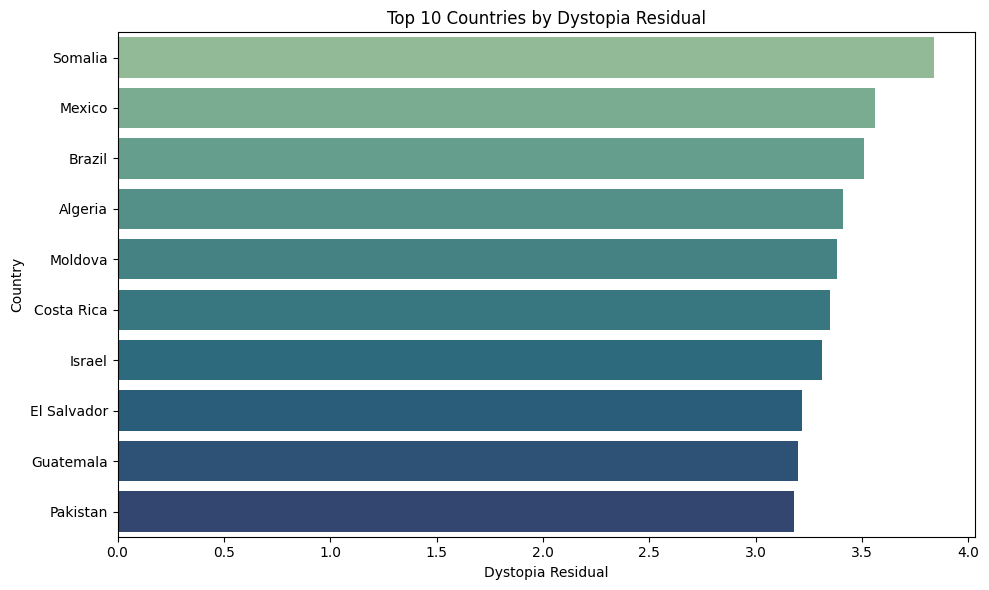

In [37]:
top_10 = h16[['Country', 'Dystopia Residual']].sort_values(by='Dystopia Residual', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Dystopia Residual', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Dystopia Residual')
plt.xlabel('Dystopia Residual')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


30- Top Region per Feature (Absolute Values)

C:\Users\User\AppData\Local\Temp\ipykernel_8620\3195046223.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_abs, x='Value', y='Feature', palette='Set2')


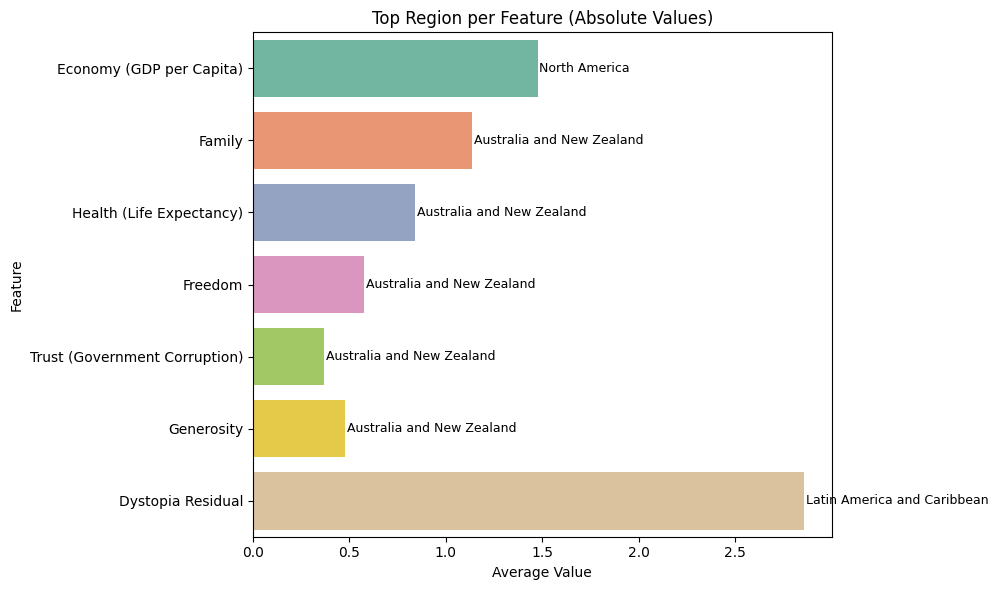

In [ ]:
features = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia Residual'
]
data = h16[['Region'] + features].dropna()
top_regions_abs = []
for feature in features:
    region_avg = data.groupby('Region')[feature].mean()
    top_region = region_avg.idxmax()
    top_value = region_avg.max()
    top_regions_abs.append({'Feature': feature, 'Value': top_value, 'Region': top_region})
df_abs = pd.DataFrame(top_regions_abs)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_abs, x='Value', y='Feature', palette='Set2')
for i, row in df_abs.iterrows():
    ax.text(row['Value'] + 0.01, i, row['Region'], va='center', fontsize=9, color='black')
plt.title('Top Region per Feature (Absolute Values)')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


31- Top Region per Feature (as % of Happiness Score)

C:\Users\User\AppData\Local\Temp\ipykernel_8620\1870582209.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_ratio, x='Value', y='Feature', palette='Set3')


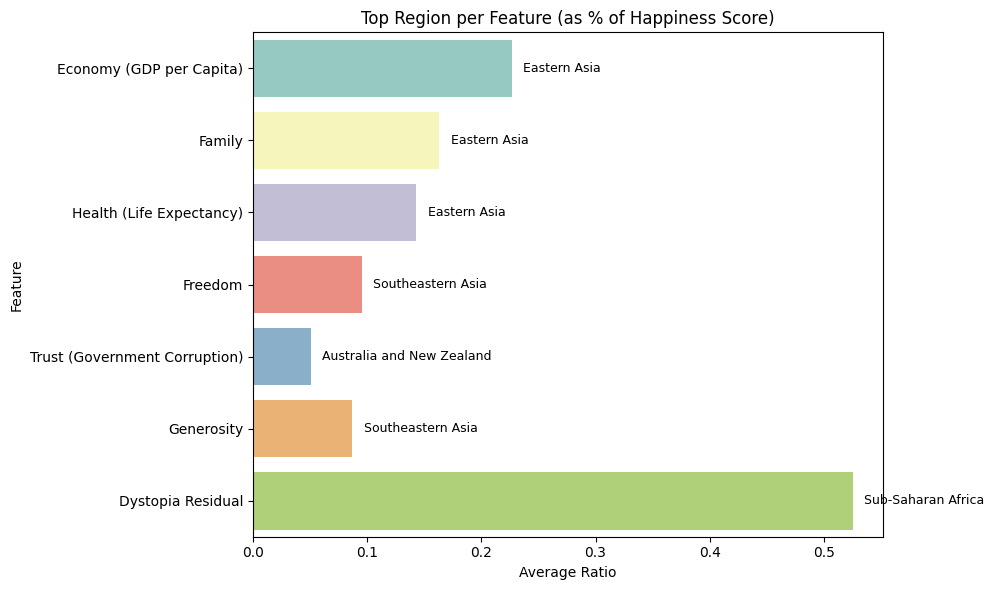

In [ ]:
features = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia Residual'
]
data = h16[['Region', 'Happiness Score'] + features].dropna()
top_regions_ratio = []
for feature in features:
    data['Ratio'] = data[feature] / data['Happiness Score']
    region_avg_ratio = data.groupby('Region')['Ratio'].mean()
    top_region = region_avg_ratio.idxmax()
    top_value = region_avg_ratio.max()
    top_regions_ratio.append({'Feature': feature, 'Value': top_value, 'Region': top_region})
df_ratio = pd.DataFrame(top_regions_ratio)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_ratio, x='Value', y='Feature', palette='Set3')
for i, row in df_ratio.iterrows():
    ax.text(row['Value'] + 0.01, i, row['Region'], va='center', fontsize=9, color='black')
plt.title('Top Region per Feature (as % of Happiness Score)')
plt.xlabel('Average Ratio')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
